Task 3: Clustering Analysis – Customer Segmentation

Dataset Information:
Shape: (200, 5)

First 5 rows:
   CustomerID   Genre  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

Data Types:
CustomerID         int64
Genre             object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

Summary Statistics:
       CustomerID         Age  Annual Income  Spending Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000


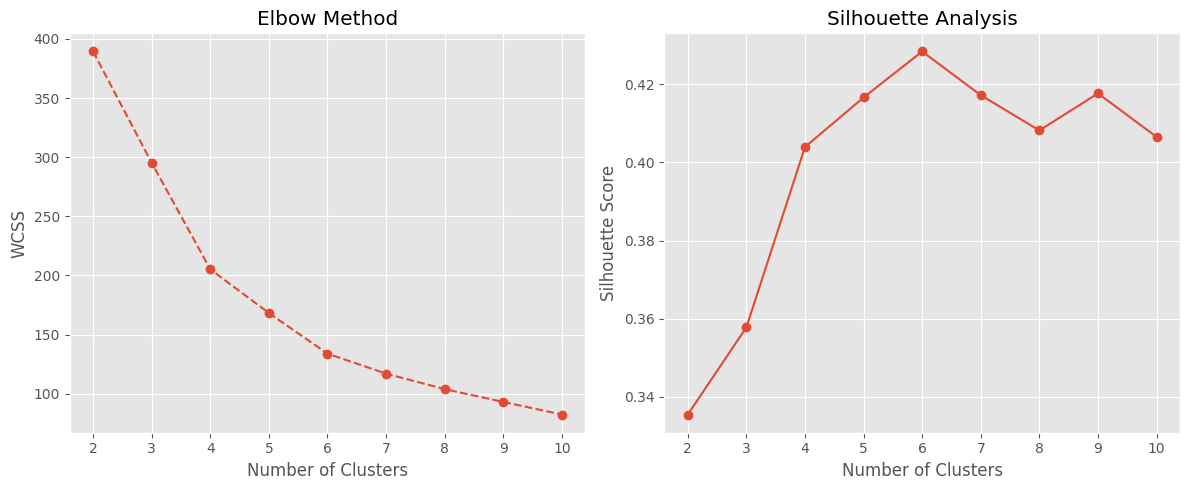


Optimal number of clusters selected: 5


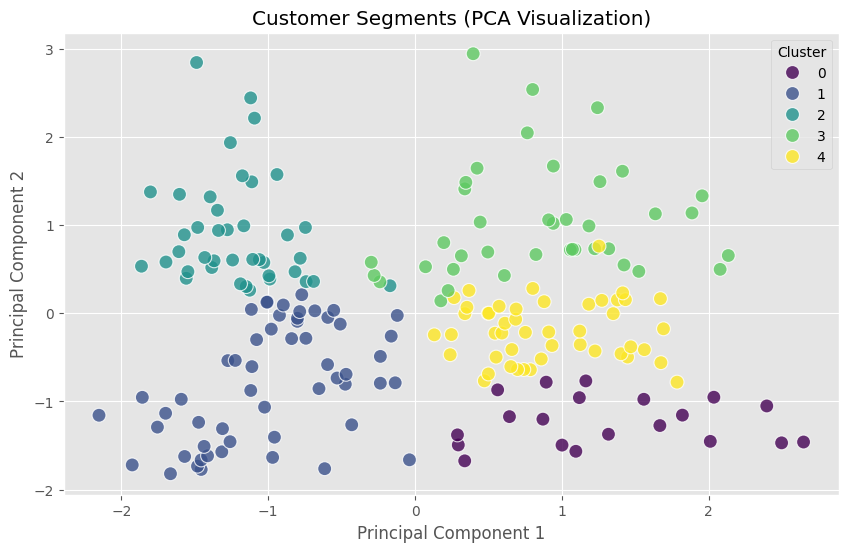

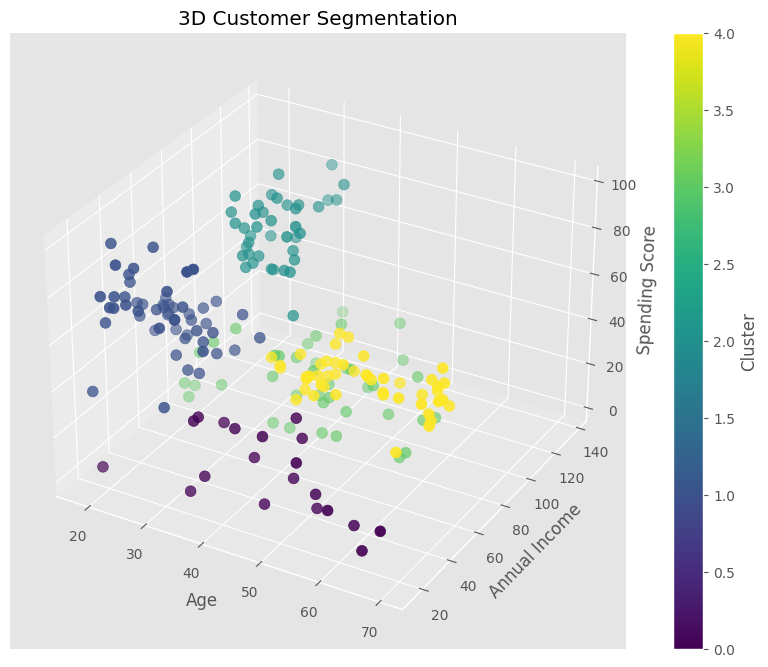

<Figure size 1200x800 with 0 Axes>

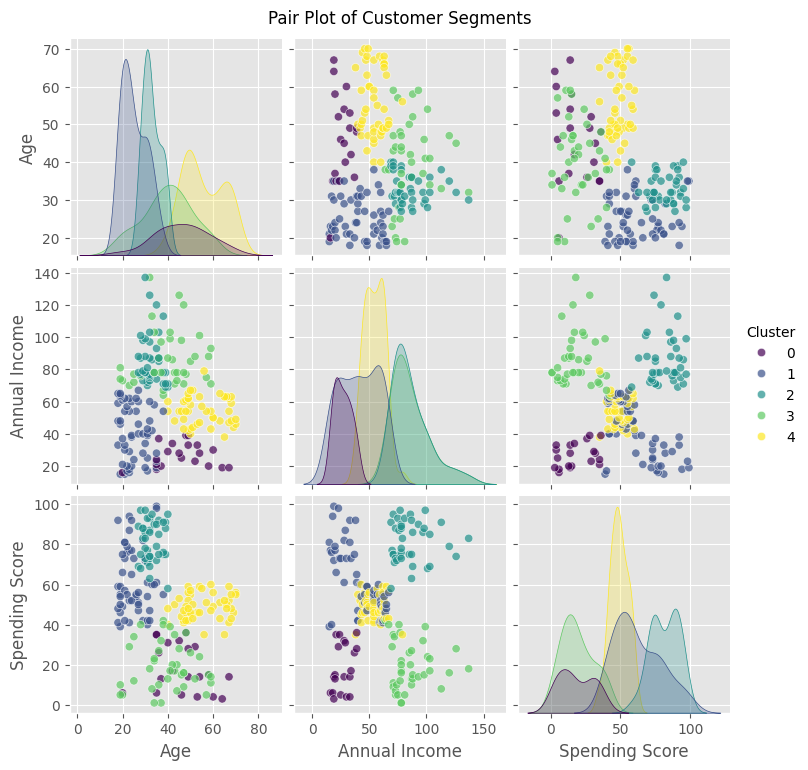


Cluster Summary:
   Cluster   Age  Annual Income  Spending Score  Count
0        0  46.2           27.0            18.4     20
1        1  25.2           41.0            62.2     54
2        2  32.9           86.0            81.5     40
3        3  39.9           86.0            19.4     39
4        4  55.6           54.0            48.9     47


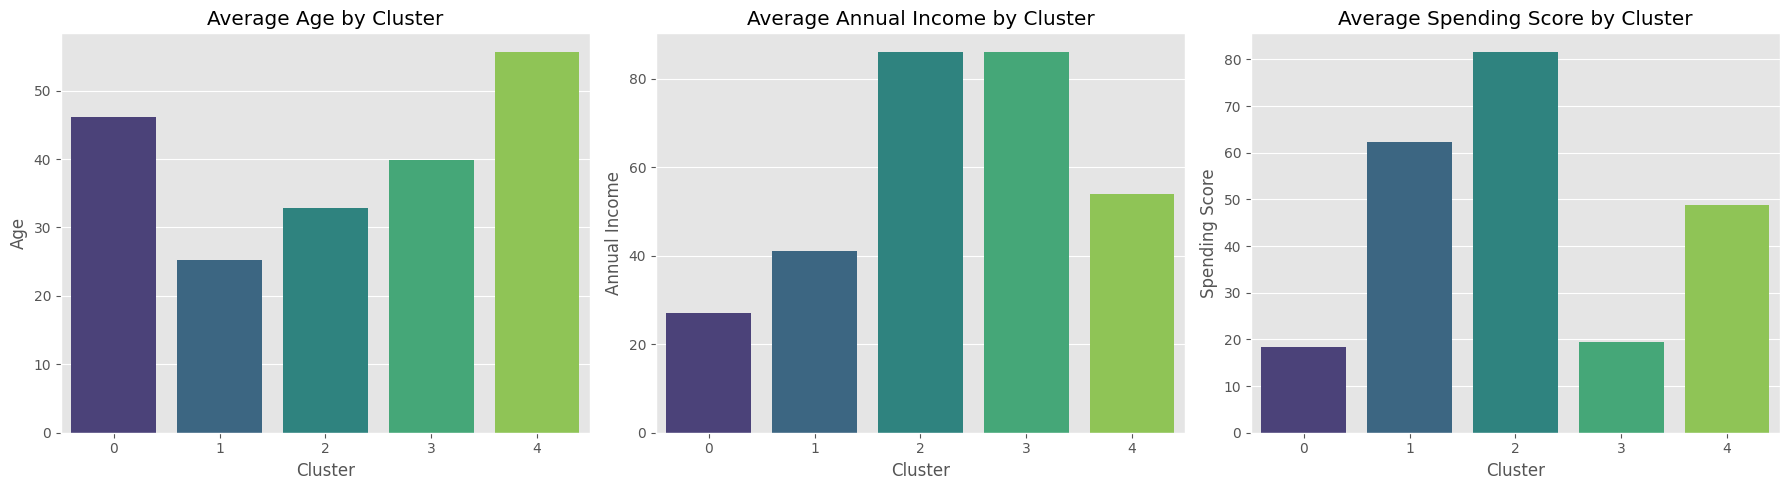

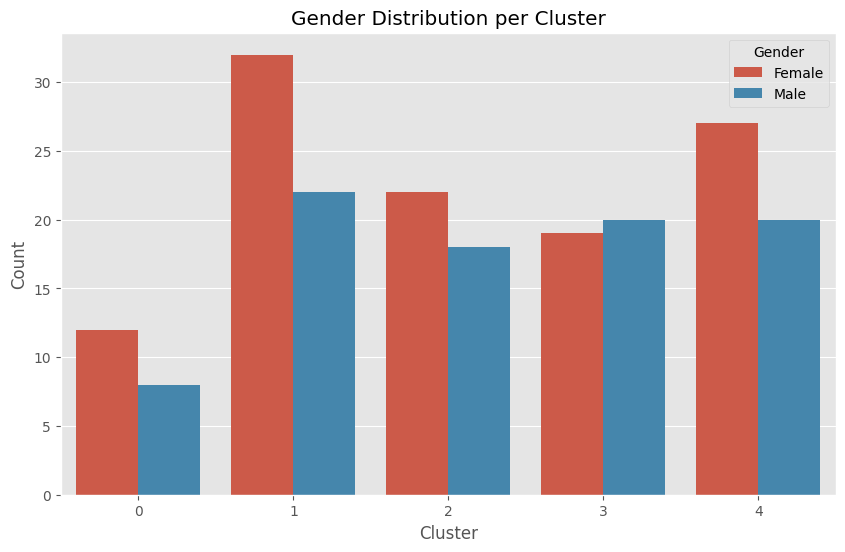


Customer Segmentation Insights and Recommendations

Cluster 0: High-Income Moderate Spenders
- Characteristics: Middle-aged, high income, moderate spending
- Recommendations:
  1. Offer premium but practical products
  2. Target with loyalty programs
  3. Focus on quality and durability in marketing

Cluster 1: Low-Income High Spenders
- Characteristics: Young, low income, high spending
- Recommendations:
  1. Offer trendy, affordable products
  2. Provide payment plans or discounts
  3. Market through social media platforms

Cluster 2: Average Consumers
- Characteristics: Middle-aged, average income and spending
- Recommendations:
  1. Offer balanced value products
  2. Family-oriented promotions
  3. Focus on reliability and value

Cluster 3: High-Income High Spenders
- Characteristics: Young to middle-aged, high income and spending
- Recommendations:
  1. Target with luxury and premium products
  2. Exclusive offers and early access
  3. Personal shopping experiences

Cluster 4: Lo

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv('/content/Customers_data.csv')

# Rename columns for consistency
df = df.rename(columns={
    'Annual_Income_(k$)': 'Annual Income',
    'Spending_Score': 'Spending Score'
})

# Display dataset info
print("="*50)
print("Dataset Information:")
print("="*50)
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values and duplicates
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Data Preprocessing
# Select relevant features for clustering
X = df[['Age', 'Annual Income', 'Spending Score']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine optimal number of clusters
wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    if n_clusters > 1:
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_silhouette.png')
plt.show()

# Based on the plots, we'll choose 5 clusters
optimal_clusters = 5
print(f"\nOptimal number of clusters selected: {optimal_clusters}")

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster',
                palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('cluster_pca.png')
plt.show()

# 3D Visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['Age'], df['Annual Income'], df['Spending Score'],
                     c=df['Cluster'], cmap='viridis', s=60)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
ax.set_title('3D Customer Segmentation')
plt.colorbar(scatter, label='Cluster')
plt.savefig('3d_clusters.png')
plt.show()

# Pair plots
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='Cluster', palette='viridis',
             vars=['Age', 'Annual Income', 'Spending Score'],
             diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pair Plot of Customer Segments', y=1.02)
plt.savefig('pair_plot.png')
plt.show()

# Cluster analysis
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income': 'mean',
    'Spending Score': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'}).reset_index()

cluster_summary['Age'] = cluster_summary['Age'].round(1)
cluster_summary['Annual Income'] = cluster_summary['Annual Income'].round(0)
cluster_summary['Spending Score'] = cluster_summary['Spending Score'].round(1)

print("\nCluster Summary:")
print(cluster_summary)

# Visualize cluster characteristics
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=cluster_summary, x='Cluster', y='Age', ax=axes[0], palette='viridis')
axes[0].set_title('Average Age by Cluster')

sns.barplot(data=cluster_summary, x='Cluster', y='Annual Income', ax=axes[1], palette='viridis')
axes[1].set_title('Average Annual Income by Cluster')

sns.barplot(data=cluster_summary, x='Cluster', y='Spending Score', ax=axes[2], palette='viridis')
axes[2].set_title('Average Spending Score by Cluster')

plt.tight_layout()
plt.savefig('cluster_characteristics.png')
plt.show()

# Gender distribution per cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Genre')
plt.title('Gender Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.savefig('gender_distribution.png')
plt.show()

# Insights and Recommendations
print("\n" + "="*50)
print("Customer Segmentation Insights and Recommendations")
print("="*50)

cluster_interpretations = {
    0: {
        'name': 'High-Income Moderate Spenders',
        'characteristics': 'Middle-aged, high income, moderate spending',
        'recommendations': [
            'Offer premium but practical products',
            'Target with loyalty programs',
            'Focus on quality and durability in marketing'
        ]
    },
    1: {
        'name': 'Low-Income High Spenders',
        'characteristics': 'Young, low income, high spending',
        'recommendations': [
            'Offer trendy, affordable products',
            'Provide payment plans or discounts',
            'Market through social media platforms'
        ]
    },
    2: {
        'name': 'Average Consumers',
        'characteristics': 'Middle-aged, average income and spending',
        'recommendations': [
            'Offer balanced value products',
            'Family-oriented promotions',
            'Focus on reliability and value'
        ]
    },
    3: {
        'name': 'High-Income High Spenders',
        'characteristics': 'Young to middle-aged, high income and spending',
        'recommendations': [
            'Target with luxury and premium products',
            'Exclusive offers and early access',
            'Personal shopping experiences'
        ]
    },
    4: {
        'name': 'Low-Income Low Spenders',
        'characteristics': 'All ages, low income and spending',
        'recommendations': [
            'Value-oriented products and discounts',
            'Essential items promotions',
            'Budget-friendly options'
        ]
    }
}

for cluster_id in sorted(cluster_interpretations.keys()):
    cluster_info = cluster_interpretations[cluster_id]
    print(f"\nCluster {cluster_id}: {cluster_info['name']}")
    print(f"- Characteristics: {cluster_info['characteristics']}")
    print("- Recommendations:")
    for i, rec in enumerate(cluster_info['recommendations'], 1):
        print(f"  {i}. {rec}")
# Save clustered data
df.to_csv('clustered_mall_customers.csv', index=False)
print("\nClustered dataset saved as 'clustered_mall_customers.csv'")